# Chapter 1. Exploratory Data Analysis

### Elements of Structured Data
    

#### KEY TERMS FOR DATA TYPES

<u>Continuous:</u><br>
Data that can take on any value in an interval.

Synonyms:<br>
interval, float, numeric

<u>Discrete:</u><br>
Data that can take on only integer values, such as counts.

Synonyms:<br>
integer, count

<u>Categorical:</u><br>
Data that can take on only a specific set of values representing a set of possible categories.

Synonyms:<br>
enums, enumerated, factors, nominal, polychotomous

<u>Binary:</u><br>
A special case of categorical data with just two categories of values (0/1, true/false).

Synonyms:<br>
dichotomous, logical, indicator, boolean

<u>Ordinal:</u><br>
Categorical data that has an explicit ordering.

Synonyms:<br>
ordered factor


#### KEY IDEAS

Data is typically classified in software by type.

Data types include continuous, discrete, categorical (which includes binary), and ordinal.

Data typing in software acts as a signal to the software on how to process the data.

### Rectangular Data

#### KEY TERMS FOR RECTANGULAR DATA

<u>Data frame</u>:<br>
Rectangular data (like a spreadsheet) is the basic data structure for statistical and machine learning models.

<u>Feature</u>:<br>
A column in the table is commonly referred to as a feature.

Synonyms
attribute, input, predictor, variable

<u>Outcome</u>:<br>
Many data science projects involve predicting an outcome—often a yes/no outcome (in Table 1-1, it is “auction was competitive or not”). The features are sometimes used to predict the outcome in an experiment or study.

Synonyms
dependent variable, response, target, output

<u>Records</u>:<br>
A row in the table is commonly referred to as a record.

Synonyms
case, example, instance, observation, pattern, sample

### Estimates of Location

#### KEY TERMS FOR ESTIMATES OF LOCATION

Mean:<br>
The sum of all values divided by the number of values.

Synonyms:<br>
average

Weighted mean:<br>
The sum of all values times a weight divided by the sum of the weights.

Synonyms<br>
weighted average

Median:<br>
The value such that one-half of the data lies above and below.

Synonyms:<br>
50th percentile

Weighted median:<br>
The value such that one-half of the sum of the weights lies above and below the sorted data.

Trimmed mean:<br>
The average of all values after dropping a fixed number of extreme values.

Synonyms:<br>
truncated mean

Robust:<br>
Not sensitive to extreme values.

Synonyms:<br>
resistant

Outlier:<br>
A data value that is very different from most of the data.

Synonyms:<br>
extreme value

In [27]:
# fold_path  = r'C:\Users\966317\Desktop\statistics-for-data-scientists-master\statistics-for-data-scientists\data'
fold_path = '/home/danny/Desktop/psfd2/data'
import os
os.chdir(fold_path)
# state_file_path = os.path.join(fold_path,'state.csv')

In [28]:
import pandas as pd
df_state = pd.read_csv('state.csv')

##### Finding Mean

In [29]:
import numpy as np
# 2 ways to find mean are
np.mean(df_state['Population']),df_state['Population'].mean()

(6162876.3, 6162876.3)

##### Finding Trimmed mean

In [30]:
from scipy.stats import trim_mean
trim_mean(df_state['Population'],0.1)

4783697.125

##### Finding Median

In [31]:
from numpy import median
median(df_state['Population'])

4436369.5

##### Finding Weighted mean

In [32]:
from numpy import average
average(df_state['Murder.Rate'], weights=df_state['Population'])

4.4458339811233927

##### Finding Weighted median

In [33]:
import weightedstats as ws
ws.weighted_median(df_state['Murder.Rate'], weights=df_state['Population'])

4.4000000000000004

##### KEY IDEAS

### Estimates of Variability

##### KEY TERMS FOR VARIABILITY METRICS

Deviations:<br>
The difference between the observed values and the estimate of location.

Synonyms:<br>
errors, residuals

Variance:<br>
The sum of squared deviations from the mean divided by n – 1 where n is the number of data values.

Synonyms:<br>
mean-squared-error

Standard deviation:<br>
The square root of the variance.

Synonyms:<br>
l2-norm, Euclidean norm

Mean absolute deviation:<br>
The mean of the absolute value of the deviations from the mean.

Synonyms:<br>
l1-norm, Manhattan norm

Median absolute deviation from the median:<br>
The median of the absolute value of the deviations from the median.

Range:<br>
The difference between the largest and the smallest value in a data set.

Order statistics:<br>
Metrics based on the data values sorted from smallest to biggest.

Synonyms:<br>
ranks

Percentile:<br>
The value such that P percent of the values take on this value or less and (100–P) percent take on this value or more.

Synonyms:<br>
quantile

Interquartile range:<br>
The difference between the 75th percentile and the 25th percentile.

Synonyms:<br>
IQR

##### Finding Standard Deviation

In [34]:
from numpy import std
std(df_state[["Population"]])

Population    6.779407e+06
dtype: float64

##### Finding IQR

In [35]:
from scipy.stats import iqr
iqr(df_state[["Population"]])

4847308.0

##### Finding Mean absolute deviation

In [36]:
from numpy import mean, absolute

def mean_ad(data, axis=None):
    return mean(absolute(data - mean(data, axis)), axis)
mean_ad(df_state["Population"].values)

4450933.3560000006

In [37]:
df_state["Population"].mad()

4450933.356000001

##### Finding Median absolute deviation

In [38]:
from numpy import median, absolute

def median_ad(data, axis=None):
    return median(absolute(data - mean(data, axis)), axis)
median_ad(df_state["Population"].values)

3430658.2999999998

In [39]:
from astropy.stats import median_absolute_deviation
median_absolute_deviation(df_state["Population"].values)

2596702.0

##### KEY IDEAS

The variance and standard deviation are the most widespread and routinely reported statistics of variability.

Both are sensitive to outliers.

More robust metrics include mean and median absolute deviations from the mean and percentiles (quantiles).

### Exploring the Data Distribution

##### KEY TERMS FOR EXPLORING THE DISTRIBUTION

Boxplot:<br>
A plot introduced by Tukey as a quick way to visualize the distribution of data.

Synonyms:<br>
Box and whiskers plot

Frequency table:<br>
A tally of the count of numeric data values that fall into a set of intervals (bins).

Histogram:<br>
A plot of the frequency table with the bins on the x-axis and the count (or proportion) on the y-axis.

Density plot:<br>
A smoothed version of the histogram, often based on a kernal density estimate.

##### Percentile

In [40]:
df_state['Murder.Rate'].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

##### Boxplot

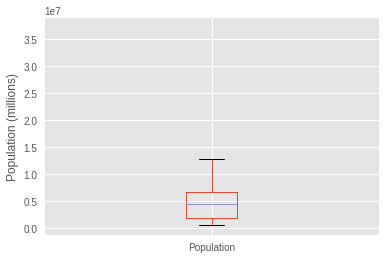

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_state["Population"].plot(kind='box')
plt.ylabel('Population (millions)')

##### Frequency Table

In [42]:
pop_binned = pd.cut(np.array(df_state["Population"]), 11, right=True, include_lowest=True)
pop_binned.value_counts()

(526935.669, 3899110.545]       24
(3899110.545, 7234595.091]      14
(7234595.091, 10570079.636]      5
(10570079.636, 13905564.182]     3
(13905564.182, 17241048.727]     0
(17241048.727, 20576533.273]     2
(20576533.273, 23912017.818]     0
(23912017.818, 27247502.364]     1
(27247502.364, 30582986.909]     0
(30582986.909, 33918471.455]     0
(33918471.455, 37253956.0]       1
dtype: int64

##### Histogram

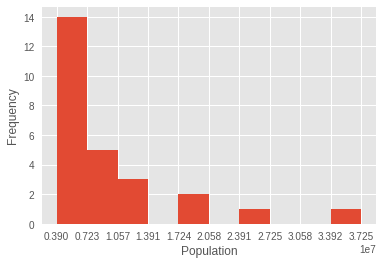

In [43]:
cuts = [intv.right for intv in pop_binned.categories]
plt.xticks(cuts)
plt.hist(df_state['Population'], bins=cuts)
plt.xlabel('Population')
plt.ylabel('Frequency')

##### Density Estimates

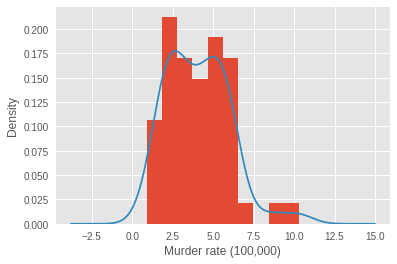

In [44]:
plt.hist(df_state['Murder.Rate'].values,normed=True)
df_state['Murder.Rate'].plot(kind='density')
plt.xlabel('Murder rate (100,000)')

##### KEY TERMS FOR EXPLORING CATEGORICAL DATA

Mode:<br>
The most commonly occurring category or value in a data set.

Expected value:<br>
When the categories can be associated with a numeric value, this gives an average value based on
a category’s probability of occurrence.

Bar charts:<br>
The frequency or proportion for each category plotted as bars.

Pie charts:<br>
The frequency or proportion for each category plotted as wedges in a pie.

##### Barplot

In [45]:
dfw = pd.read_csv('dfw_airline.csv')

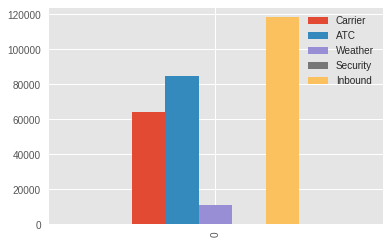

In [46]:
dfw.plot(kind='bar')

##### Correlation

In [47]:
sp500_sym_file_path = os.path.join(fold_path, 'sp500_sym.csv')
sp500_sym = pd.read_csv(sp500_sym_file_path)
sp500_px_file_path = os.path.join(fold_path, 'sp500_px.csv')
sp500_px = pd.read_csv(sp500_px_file_path, infer_datetime_format=True, index_col=0,parse_dates=True)

In [48]:
rows = sp500_px.index > '2012-07-01' 
cols = sp500_sym[sp500_sym['sector'] == 'etf']['symbol'].values
etfs = sp500_px.loc[rows,cols]

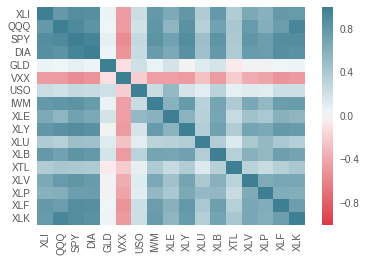

In [49]:
import seaborn as sns
corr = etfs.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap=cmap)

##### Scatterplot

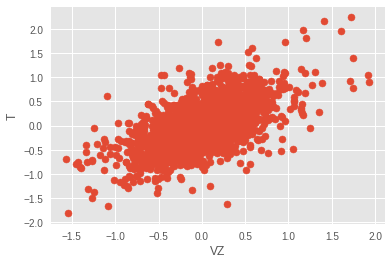

In [50]:
# telecom <- sp500_px[, sp500_sym[sp500_sym$sector=="telecommunications_services", 'symbol']]
cols = sp500_sym[sp500_sym['sector']=='telecommunications_services']['symbol'].values
telecom = sp500_px[cols]
plt.scatter(telecom['T'], telecom['VZ'])
plt.ylabel('T')
plt.xlabel('VZ')

### KEY IDEAS FOR CORRELATION

The correlation coefficient measures the extent to which two variables are associated with one another.

When high values of v1 go with high values of v2, v1 and v2 are positively associated.

When high values of v1 are associated with low values of v2, v1 and v2 are negatively associated.

The correlation coefficient is a standardized metric so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).

A correlation coefficient of 0 indicates no correlation, but be aware that random arrangements of data will produce both positive and negative values for the correlation coefficient just by chance.

##### Hexagonal Binning

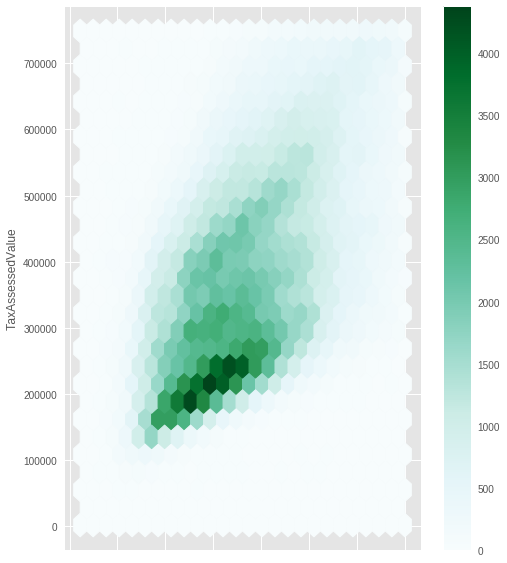

In [51]:
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax = kc_tax[(kc_tax['TaxAssessedValue'] < 750000) & (kc_tax['SqFtTotLiving'] >100) & (kc_tax['SqFtTotLiving'] <3500)]
kc_tax.plot(kind='hexbin',x=kc_tax.columns[1],y=kc_tax.columns[0],gridsize=25,figsize=(8,10))

##### Countour Plots

In [53]:
# WIP

##### Two categorical variables

In [59]:
lc_loans = pd.read_csv('lc_loans.csv')
pd.crosstab(lc_loans.grade,lc_loans.status)

status,Charged Off,Current,Fully Paid,Late
grade,,,,
0.2,146,661,216,63
0.4,96,524,138,42
0.6,63,360,101,45
0.8,51,228,100,32
1.0,53,217,88,17
1.2,400,2598,686,161
1.4,333,1875,576,140
1.6,302,1748,448,134
1.8,267,1309,347,91


##### Categorical and Numeric Data

##### Boxplot

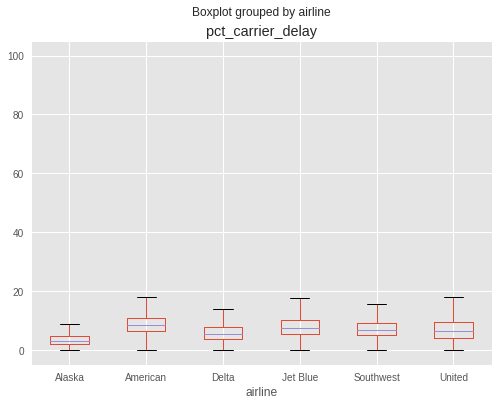

In [57]:
airline = pd.read_csv('airline_stats.csv')
airline.boxplot(column='pct_carrier_delay',by='airline',figsize=(8,6))

##### Violine Plot

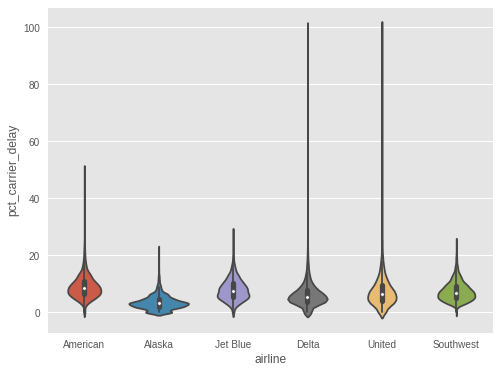

In [66]:
g = sns.violinplot(x="airline", y="pct_carrier_delay", data=airline)
g.figure.set_size_inches(8,6)

##### Visualizing Multiple Variables

In [70]:
kc_tax0 = kc_tax[(kc_tax['TaxAssessedValue'] < 750000) &
  (kc_tax['SqFtTotLiving'] > 100) &
  (kc_tax['SqFtTotLiving'] < 3500)]

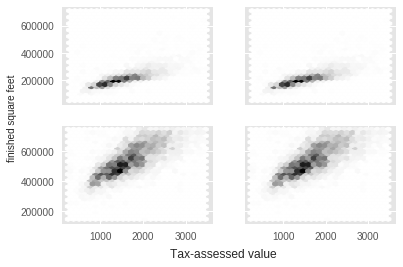

In [80]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
zips = [98188, 98105, 98108, 98126]
kc_tax0[kc_tax0['ZipCode'] == 98126]

zip_index = 0
for i in range(2):
    for j in range(2):
        kc_tax0_subset = kc_tax0[kc_tax0['ZipCode'] == zips[i]]
        zip_index += 1
        ax[i, j].hexbin(kc_tax0_subset['SqFtTotLiving'].values, 
                        kc_tax0_subset['TaxAssessedValue'].values,gridsize=25)
#         ax[i, j].set_xlabel('Tax-assessed value')
fig.text(0.5, 0.01, 'Tax-assessed value', ha='center',fontsize='large')
fig.text(0.0001, 0.5, 'finished square feet ', va='center', rotation='vertical')